In [1]:
import numpy as np 
import pandas as pd 

from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white") #white background style for seaborn plots
sns.set(style="whitegrid", color_codes=True)

import warnings
warnings.simplefilter(action='ignore')

In [2]:
# Read CSV train data file into DataFrame
train_df = pd.read_csv("https://raw.githubusercontent.com/abdullabasim/dataset/main/Titanic-train.csv")

# Read CSV test data file into DataFrame
test_df = pd.read_csv("https://raw.githubusercontent.com/abdullabasim/dataset/main/Titanic-test.csv")

# preview train data
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [5]:
train_df.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
train_data = train_df.copy()

In [7]:
print("Percentage of null age is ", round((train_data['Age'].isnull().mean()) * 100,2))

Percentage of null age is  19.87


<Axes: xlabel='Age', ylabel='Count'>

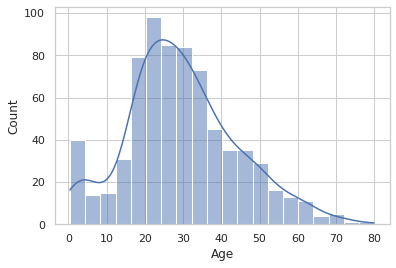

In [8]:
sns.histplot(data=train_data,x='Age',kde=True)

In [9]:
train_data['Age'].fillna(train_data['Age'].median(skipna=True),inplace=True)
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
print("Percentage of null Cabin is ", round((train_data['Cabin'].isnull().mean()) * 100,2))

Percentage of null Cabin is  77.1


In [11]:
train_data.drop("Cabin",axis=1,inplace=True)

In [12]:
print("Percentage of null Embarked is ", train_data['Embarked'].isnull().mean())

Percentage of null Embarked is  0.002244668911335578


In [13]:
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0],inplace=True)

train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [14]:
train_data['TravelAlone'] = np.where((train_data['SibSp'] + train_data['Parch']) > 0,0,1)
train_data.drop(['SibSp','Parch'],axis=1,inplace=True)

In [15]:
train_data.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)

In [16]:
trainning = pd.get_dummies(train_data,columns=['Sex','Embarked'],drop_first=True)

In [17]:
trainning.head()

,Survived,Pclass,Age,Fare,TravelAlone,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,7.2500,0,1,0,1
1,1,1,38.0,71.2833,0,0,0,0
2,1,3,26.0,7.9250,1,0,0,1
3,1,1,35.0,53.1000,0,0,0,1
4,0,3,35.0,8.0500,1,1,0,1


In [18]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [19]:
test_data = test_df.copy()
test_data["Age"].fillna(train_df["Age"].median(skipna=True), inplace=True)
test_data["Fare"].fillna(train_df["Fare"].median(skipna=True), inplace=True)
test_data.drop('Cabin', axis=1, inplace=True)

test_data['TravelAlone']=np.where((test_data["SibSp"]+test_data["Parch"])>0, 0, 1)

test_data.drop('SibSp', axis=1, inplace=True)
test_data.drop('Parch', axis=1, inplace=True)

testing = pd.get_dummies(test_data,columns=['Sex','Embarked'],drop_first=True)

testing.drop(['PassengerId','Name','Ticket'], axis=1, inplace=True)

In [20]:
trainning[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [21]:
train_df[['Embarked','Survived']].groupby(['Embarked'],as_index=False).mean().sort_values(by = 'Survived',ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


In [22]:
trainning[['TravelAlone','Survived']].groupby(['TravelAlone']).mean().sort_values(by = 'Survived',ascending=False)

,Survived
TravelAlone,
0,0.505650
1,0.303538


In [23]:
train_df[['Sex','Survived']].groupby(['Sex']).mean().sort_values(by = 'Survived' ,ascending=False)

,Survived
Sex,
female,0.742038
male,0.188908


In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
cols = trainning.columns
cols = [ 'Pclass', 'Age', 'Fare', 'TravelAlone', 'Sex_male','Embarked_Q', 'Embarked_S']
X = trainning[cols]
y = trainning['Survived']



In [25]:
from sklearn.model_selection import train_test_split, cross_val_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [31]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [26]:
# Applying Grid Search to find the best model and the best parameters
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

classifier = SVC( random_state = 0)

parameters = [
	{"kernel":
		["linear"],
		"C": [0.0001, 0.001, 0.1, 1, 10, 100, 1000]},
	{"kernel":
		["poly"],
		"degree": [2, 3, 4],
		"C": [0.0001, 0.001, 0.1, 1, 10, 100, 1000]},
	{"kernel":
		["rbf"],
		"gamma": ["auto", "scale"],
		"C": [0.0001, 0.001, 0.1, 1, 10, 100, 1000]}
]
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 81.74 %
Best Parameters: {'C': 1000, 'degree': 2, 'kernel': 'poly'}


In [44]:
# Training the Kernel SVM model on the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'poly',C=1000,degree = 2, random_state = 11)
classifier.fit(X_train, y_train)

SVC(C=1000, degree=2, kernel='poly', random_state=11)

In [46]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 81.88 %
Standard Deviation: 4.95 %
